# **Wine Recommender System Modeling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#wine = pd.read_csv('/content/gdrive/MyDrive/Drexel/winemag-data-130k-v2.csv')  #AS Path
wine = pd.read_csv('/content/gdrive/MyDrive/winemag-data-130k-v2.csv') #SN path

## *Data Cleaning and Preprocessing*

Dropping Irrelevant data

In [4]:
#Drop duplicated reviews
wine = wine.drop_duplicates(subset=['taster_name', 'title'])

#Drop two irrelevant columns
wine = wine.drop(["Unnamed: 0", "taster_twitter_handle"], axis=1)

Point Range

In [5]:
#Create point range feature
wine['point_range'] = np.where(wine['points'] > 88, "High", "Low")
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,point_range
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Low
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Low
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Low


Descriptions

In [6]:
#Define stop words
exclusions = set(['a','about','above','after','again','against','all','also','am','an','and','any','are',"arent",'as','at',
'be','because','been','before','being','below','between','both','but','by',
'can',"cant",'cannot','com','could',"couldnt",'did',"didnt",'do','does',"doesnt",'doing',"dont",'down','during',
'each','else','ever','few','for','from','further','get',
'had',"hadnt",'has',"hasnt",'have',"havent",'having','he',"hed","hell","hes",'hence','her','here',"heres",'hers','herself','him','himself','his','how',"hows",'however','http',
'i',"id","ill","im","ive",'if','in','into','is',"isnt",'it','its','itself','just','k',"lets",'like',
'me','more','most',"mustnt",'my','myself','no','nor','not','now',
'of','off','on','once','only','or','other','otherwise','ought','our','ours','ourselves','out','over','own',
'r','same','shall',"shant",'she',"shed","shell","shes",'should',"shouldnt",'since','so','some','such',
'than','that',"thats",'the','their','theirs','them','themselves','then','there',"theres",'therefore','these','they',"theyd","theyll","theyre","theyve",'this','those','through','to','too',
'under','until','up','very',
'was',"wasnt",'we',"wed","well","were","weve","werent",'what',"whats",'when',"whens",'where',"wheres",'which','while','who',"whos",'whom','why',"whys",'with',"wont",'would',"wouldnt",'www',
'you',"youd","youll","youre","youve",'your','yours','yourself','yourselves'])

In [7]:
import string

def clean_description(x):
    if isinstance(x, str):
        x = x.lower()
        x = x.translate(str.maketrans('', '', string.punctuation))
        x = x.split()
        final_lst = []
        for word in x:
            if word not in exclusions:
                final_lst.append(word)
        return final_lst
    else:
        return []

In [8]:
#clean the description of each wine to isolate every word
wine['description'] = wine['description'].apply(clean_description)

#check to see if description is cleaned as expected
wine[['description']].head()

,description
0,"[aromas, include, tropical, fruit, broom, brim..."
1,"[ripe, fruity, wine, smooth, still, structured..."
2,"[tart, snappy, flavors, lime, flesh, rind, dom..."
3,"[pineapple, rind, lemon, pith, orange, blossom..."
4,"[much, regular, bottling, 2012, comes, across,..."


Dropping Nulls

In [9]:
# remove rows with price of null
wine = wine.dropna(subset=['price'])

#shape should now be 118971 - 8265 = 110706
wine.shape

(110706, 13)

In [10]:
## remove rows with country of null
wine = wine.dropna(subset=['country'])

#shape should now be 110706 - 55 = 110651
wine.shape

(110651, 13)

In [11]:
## remove rows with variety of null
wine = wine.dropna(subset=['variety'])

#shape should now be 110651 - 1 = 110650
wine.shape

(110650, 13)

Cleaning Location

In [12]:
#Combine province and region_2 (for US states) to get location feature

#Create location column as duplicate of province to start
wine['location'] = wine.loc[:, 'province']

#For U.S states with region_2 we will assign this as the location
wine.loc[(wine['country']=='US') & (wine['region_2'].notnull()), 'location'] = wine['region_2']

Cleaning Price

In [13]:
#Create log transformed price column to handle the right skew
wine['transformed_price'] = np.log(wine['price'])

Cleaning Points

In [14]:
#Finally, re-scale the points column
wine['points_transformed'] = (wine['points'] - 80) * 0.5 + 1

Data before One-Hot Encoding

In [ ]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,point_range,location,transformed_price,points_transformed
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low,Douro,2.708050,4.5
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low,Willamette Valley,2.639057,4.5
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Low,Michigan,2.564949,4.5
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Low,Willamette Valley,4.174387,4.5
5,Spain,"[blackberry, raspberry, aromas, show, typical,...",Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Low,Northern Spain,2.708050,4.5


In [ ]:
wine.shape

(110650, 16)

One-Hot Encoding - location

In [ ]:
wine.location.unique().size

437

In [15]:
# One-Hot Encoding the location column
locations = pd.get_dummies(wine.location, prefix = 'Location')
locations.head()

,Location_Achaia,Location_Aconcagua Costa,Location_Aconcagua Valley,Location_Aegean,Location_Agioritikos,Location_Ahr,Location_Alenquer,Location_Alentejano,Location_Alentejo,Location_Alenteo,...,Location_Western Australia,Location_Western Cape,Location_Wiener Gemischter Satz,Location_Willamette Valley,Location_Württemberg,Location_Zenata,Location_Österreichischer Perlwein,Location_Österreichischer Sekt,Location_Štajerska,Location_Župa
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
wine2 = wine.join(locations)
wine2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,...,Location_Western Australia,Location_Western Cape,Location_Wiener Gemischter Satz,Location_Willamette Valley,Location_Württemberg,Location_Zenata,Location_Österreichischer Perlwein,Location_Österreichischer Sekt,Location_Štajerska,Location_Župa
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,0,0,0,0,0,0,0
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,1,0,0,0,0,0,0
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,0,0,0,0,0,0,0,0
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,0,1,0,0,0,0,0,0
5,Spain,"[blackberry, raspberry, aromas, show, typical,...",Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,...,0,0,0,0,0,0,0,0,0,0


One-Hot Encoding - Variety

In [ ]:
wine.variety.unique().size

691

In [17]:
# One-Hot Encoding the variety column
varieties = pd.get_dummies(wine.variety, prefix = 'Variety')
varieties.head()

,Variety_Abouriou,Variety_Agiorgitiko,Variety_Aglianico,Variety_Aidani,Variety_Airen,Variety_Albana,Variety_Albanello,Variety_Albariño,Variety_Albarossa,Variety_Aleatico,...,Variety_Xynisteri,Variety_Yapincak,Variety_Zibibbo,Variety_Zierfandler,Variety_Zierfandler-Rotgipfler,Variety_Zinfandel,Variety_Zlahtina,Variety_Zweigelt,Variety_Çalkarası,Variety_Žilavka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
wine2 = wine2.join(varieties)
wine2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,...,Variety_Xynisteri,Variety_Yapincak,Variety_Zibibbo,Variety_Zierfandler,Variety_Zierfandler-Rotgipfler,Variety_Zinfandel,Variety_Zlahtina,Variety_Zweigelt,Variety_Çalkarası,Variety_Žilavka
1,Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,0,0,0,0,0,0,0
2,US,"[tart, snappy, flavors, lime, flesh, rind, dom...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,0,0,0,0,0,0,0
3,US,"[pineapple, rind, lemon, pith, orange, blossom...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,0,0,0,0,0,0,0,0
4,US,"[much, regular, bottling, 2012, comes, across,...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,0,0,0,0,0,0,0,0
5,Spain,"[blackberry, raspberry, aromas, show, typical,...",Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,...,0,0,0,0,0,0,0,0,0,0


## *Modeling*

### Content-Based

In [19]:
wine.taster_name.value_counts()

Roger Voss            18068
Michael Schachner     13762
Kerin O’Keefe          8852
Paul Gregutt           8825
Virginie Boone         8663
Matt Kettmann          5612
Joe Czerwinski         4630
Sean P. Sullivan       4410
Anna Lee C. Iijima     3969
Jim Gordon             3745
Anne Krebiehl MW       2993
Lauren Buzzeo          1581
Susan Kostrzewa        1003
Mike DeSimone           440
Jeff Jenssen            415
Alexander Peartree      381
Carrie Dykes            128
Fiona Adams              24
Christina Pickard         6
Name: taster_name, dtype: int64

In [20]:
#select target user for which ratings will be predicted based on their preferences
content_df = wine2[wine2['taster_name']=='Roger Voss']

In [21]:
#filter the data frame to only consider wines that have common variety/location combinations
content_df = content_df.groupby(['variety', 'location']).filter(lambda x:len(x)>3)
content_df.shape

(17481, 1144)

In [22]:
regression_df = content_df.drop(['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'point_range', 'location'], axis=1)

In [ ]:
#This can be ran to remove the one-hot encoded columns populated with 0 for all records after filtering, but is not required
#Seems that when this sell IS NOT run, the model will perform better
#regression_df = regression_df.loc[:, (regression_df != 0).any(axis=0)]

In [23]:
regression_df.shape

(17481, 1132)

In [24]:
X = regression_df.drop(['taster_name', 'title', 'points_transformed'], axis=1)
y = regression_df['points_transformed']

In [28]:
X.head()

,transformed_price,Location_Achaia,Location_Aconcagua Costa,Location_Aconcagua Valley,Location_Aegean,Location_Agioritikos,Location_Ahr,Location_Alenquer,Location_Alentejano,Location_Alentejo,...,Variety_Xynisteri,Variety_Yapincak,Variety_Zibibbo,Variety_Zierfandler,Variety_Zierfandler-Rotgipfler,Variety_Zinfandel,Variety_Zlahtina,Variety_Zweigelt,Variety_Çalkarası,Variety_Žilavka
1,2.708050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.178054,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.295837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,3.401197,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,2.197225,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
linreg = linear_model.LinearRegression()

In [36]:
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
lin_pred = linreg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, lin_pred, squared=False)
print('RMSE:', rmse)

r2 = r2_score(y_test, lin_pred)
print('R-Squared:', r2)

RMSE: 1.0259343937140386
R-Squared: 0.5556095369918654


In [39]:
#Try the same thing with country instead of location just for fun -> It doesn't perform as well

countries = pd.get_dummies(wine.country, prefix = 'Country')
wine_v2 = wine.join(countries)
wine_v2 = wine_v2.join(varieties)

content_df2 = wine_v2[wine_v2['taster_name']=='Roger Voss']
content_df2 = content_df2.groupby(['variety', 'country']).filter(lambda x:len(x)>3)

regression_df2 = content_df2.drop(['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'point_range', 'location'], axis=1)

X2 = regression_df2.drop(['taster_name', 'title', 'points_transformed'], axis=1)
y2 = regression_df2['points_transformed']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

linreg2 = linear_model.LinearRegression()

linreg2.fit(X_train2, y_train2)

lin_pred2 = linreg2.predict(X_test2)

rmse2 = mean_squared_error(y_test2, lin_pred2, squared=False)
print('RMSE:', rmse2)

r22 = r2_score(y_test2, lin_pred2)
print('R-Squared:', r22)

RMSE: 1.0533657841851145
R-Squared: 0.545837454320241


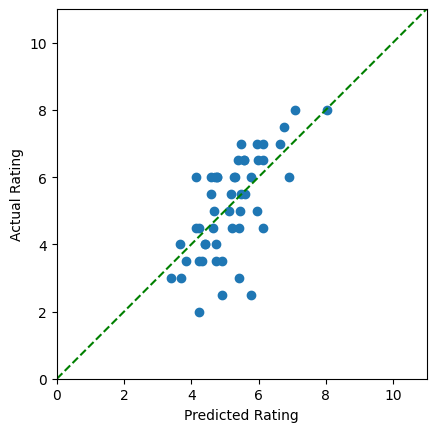

In [40]:
plt.scatter(lin_pred[:50], y_test[:50])
plt.xlim(0, 11)
plt.ylim(0, 11)
ax = plt.gca()
ax.set_aspect('equal')
plt.ylabel('Actual Rating')
plt.xlabel('Predicted Rating')
x = np.linspace(0, 11)
#plt.plot(x, x+1, '--r')
#plt.plot(x, x-1, '--r')
plt.plot(x, x+0, '--g')
plt.show()

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [55]:
dtr_params = {'max_depth':[18, 24, 30, 36], 'min_samples_split':[75,150,175,225]}

dtr_tuning = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = dtr_params, scoring='r2', cv=10)

In [56]:
dtr_tuning.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [18, 24, 30, 36],
                         'min_samples_split': [75, 150, 175, 225]},
             scoring='r2')

In [57]:
dtr_tuning.best_params_

{'max_depth': 30, 'min_samples_split': 175}

In [58]:
dtr = DecisionTreeRegressor(max_depth=30, min_samples_split=175)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_split=175)

In [59]:
dtr_pred = dtr.predict(X_test)

In [60]:
rmse = mean_squared_error(y_test, dtr_pred, squared=False)
print('RMSE:', rmse)

r2 = r2_score(y_test, dtr_pred)
print('R-Squared:', r2)

RMSE: 1.0286940080329219
R-Squared: 0.5532156302489066


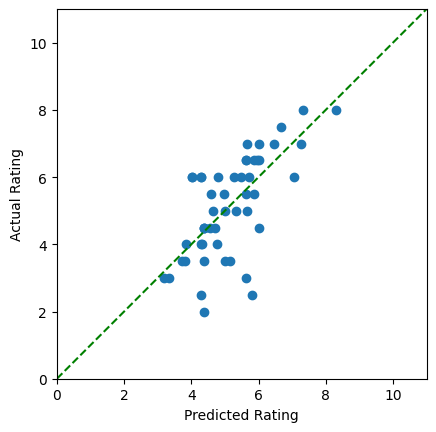

In [61]:
plt.scatter(dtr_pred[:50], y_test[:50])
plt.xlim(0, 11)
plt.ylim(0, 11)
ax = plt.gca()
ax.set_aspect('equal')
plt.ylabel('Actual Rating')
plt.xlabel('Predicted Rating')
x = np.linspace(0, 11)
#plt.plot(x, x+1, '--r')
#plt.plot(x, x-1, '--r')
plt.plot(x, x+0, '--g')
plt.show()

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf_params = {'n_estimators':[10, 100, 200], 'max_depth':[10, 20, 25], 'min_samples_split':[50, 75, 100]}

rf_tuning = GridSearchCV(estimator = RandomForestRegressor(), param_grid = rf_params, scoring='r2', cv=3)

In [78]:
#This takes like 10 mins to run so be careful
rf_tuning.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 25],
                         'min_samples_split': [50, 75, 100],
                         'n_estimators': [10, 100, 200]},
             scoring='r2')

In [79]:
rf_tuning.best_params_

{'max_depth': 25, 'min_samples_split': 50, 'n_estimators': 200}

In [80]:
rfr = RandomForestRegressor(n_estimators= 200, max_depth= 25, min_samples_split=50)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_split=50, n_estimators=200)

In [81]:
rfr_pred = rfr.predict(X_test)

In [82]:
rmse = mean_squared_error(y_test, rfr_pred, squared=False)
print('RMSE:', rmse)

r2 = r2_score(y_test, rfr_pred)
print('R-Squared:', r2)

RMSE: 0.9983521944754483
R-Squared: 0.5791831657595267


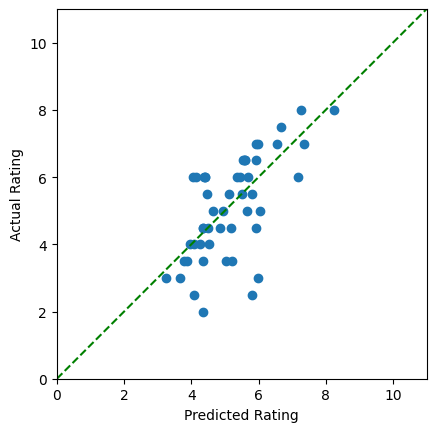

In [84]:
plt.scatter(rfr_pred[:50], y_test[:50])
plt.xlim(0, 11)
plt.ylim(0, 11)
ax = plt.gca()
ax.set_aspect('equal')
plt.ylabel('Actual Rating')
plt.xlabel('Predicted Rating')
x = np.linspace(0, 11)
#plt.plot(x, x+1, '--r')
#plt.plot(x, x-1, '--r')
plt.plot(x, x+0, '--g')
plt.show()

In [62]:
clf_df = content_df.drop(['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'points_transformed', 'location'], axis=1)

In [63]:
clf_df.shape

(17481, 1132)

In [64]:
clf_df.loc[clf_df['point_range']=='High', 'classifier']=1
clf_df.loc[clf_df['point_range']=='Low', 'classifier']=0

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
X_logreg = clf_df.drop(['taster_name', 'title', 'point_range', 'classifier'], axis=1)
y_logreg = clf_df['classifier']

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_logreg, y_logreg, test_size=0.2)

In [68]:
clf = LogisticRegression()

In [69]:
clf.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
clf_pred = clf.predict(X_test2)

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80      1835
         1.0       0.80      0.73      0.76      1662

    accuracy                           0.78      3497
   macro avg       0.79      0.78      0.78      3497
weighted avg       0.79      0.78      0.78      3497



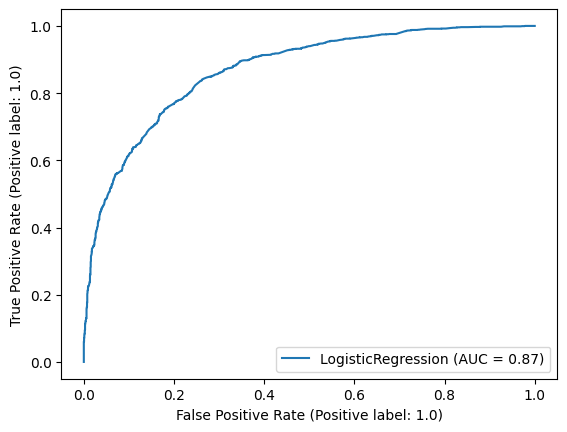

[[1529  306]
 [ 448 1214]]


In [71]:
from sklearn import metrics

#Show the metrics for the model performance
print(metrics.classification_report(y_test2, clf_pred))

#Plot the ROC Curve
metrics.RocCurveDisplay.from_estimator(clf, X_test2, y_test2)
plt.show()

#Display the Confusion Matrix
confusion = metrics.confusion_matrix(y_test2, clf_pred)
print(confusion)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1876
         1.0       0.80      0.75      0.78      1701

    accuracy                           0.79      3577
   macro avg       0.79      0.79      0.79      3577
weighted avg       0.79      0.79      0.79      3577



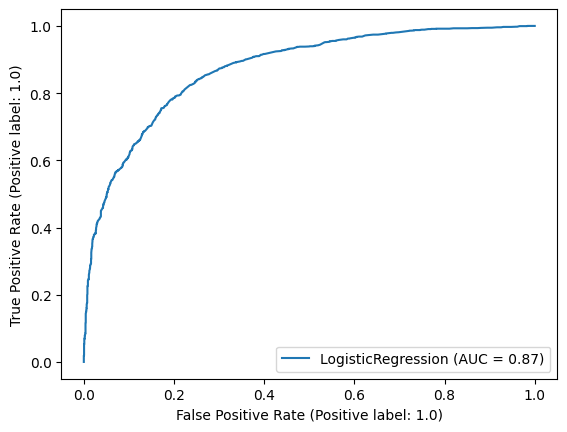

[[1554  322]
 [ 421 1280]]


In [ ]:
#Maybe try more classifiers with country? This works about the same as above
clf_df2 = content_df2.drop(['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'points_transformed', 'location'], axis=1)

clf_df2.loc[clf_df2['point_range']=='High', 'classifier']=1
clf_df2.loc[clf_df2['point_range']=='Low', 'classifier']=0


X3 = clf_df2.drop(['taster_name', 'title', 'point_range', 'classifier'], axis=1)
y3 = clf_df2['classifier']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

clf2 = LogisticRegression()

clf2.fit(X_train3, y_train3)

clf_pred2 = clf2.predict(X_test3)

print(metrics.classification_report(y_test3, clf_pred2))

#Plot the ROC Curve
metrics.RocCurveDisplay.from_estimator(clf2, X_test3, y_test3)
plt.show()

#Display the Confusion Matrix
confusion = metrics.confusion_matrix(y_test3, clf_pred2)
print(confusion)

In [72]:
from sklearn.tree import DecisionTreeClassifier

dtc_params = {'criterion':['gini', 'entropy'], 'max_depth':[20, 25, 30], 'min_samples_split':[75,150,200]}

dtc_tuning = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = dtc_params, scoring='roc_auc', cv=10)

In [73]:
dtc_tuning.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [75, 150, 200]},
             scoring='roc_auc')

In [74]:
dtc_tuning.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 200}

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      1835
         1.0       0.78      0.74      0.76      1662

    accuracy                           0.78      3497
   macro avg       0.78      0.78      0.78      3497
weighted avg       0.78      0.78      0.78      3497



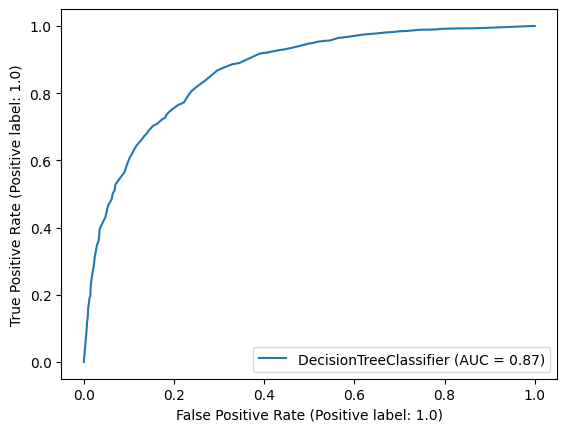

[[1498  337]
 [ 438 1224]]


In [75]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=200)

dtc.fit(X_train2, y_train2)

dtc_pred = dtc.predict(X_test2)

print(metrics.classification_report(y_test2, dtc_pred))

#Plot the ROC Curve
metrics.RocCurveDisplay.from_estimator(dtc, X_test2, y_test2)
plt.show()

#Display the Confusion Matrix
confusion = metrics.confusion_matrix(y_test2, dtc_pred)
print(confusion)

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc_params = {'criterion': ['gini', 'entropy'], 'n_estimators':[10, 100, 200], 'max_depth':[10, 20, 25], 'min_samples_split':[75, 100, 150]}

rfc_tuning = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rfc_params, scoring='roc_auc', cv=3)

In [86]:
rfc_tuning.fit(X_train2, y_train2)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 25],
                         'min_samples_split': [75, 100, 150],
                         'n_estimators': [10, 100, 200]},
             scoring='roc_auc')

In [87]:
rfc_tuning.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_split': 75,
 'n_estimators': 200}

In [89]:
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators= 200, max_depth= 25, min_samples_split=75)
rfc.fit(X_train2, y_train2)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=75,
                       n_estimators=200)

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80      1835
         1.0       0.79      0.73      0.76      1662

    accuracy                           0.78      3497
   macro avg       0.78      0.78      0.78      3497
weighted avg       0.78      0.78      0.78      3497



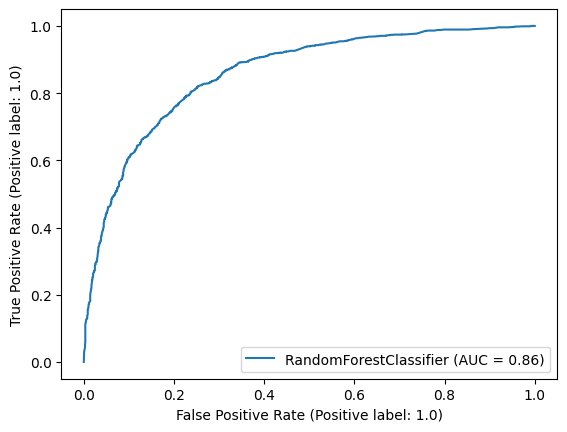

[[1514  321]
 [ 457 1205]]


In [90]:
rfc_pred = rfc.predict(X_test2)

print(metrics.classification_report(y_test2, rfc_pred))

#Plot the ROC Curve
metrics.RocCurveDisplay.from_estimator(rfc, X_test2, y_test2)
plt.show()

#Display the Confusion Matrix
confusion = metrics.confusion_matrix(y_test2, rfc_pred)
print(confusion)

In [91]:
#in practice for Roger Voss
train = wine2[wine2['taster_name']=='Roger Voss']
predict = wine2[wine2['taster_name']!='Roger Voss']

In [92]:
predict.shape

(92582, 1144)

In [93]:
X_rv = train.drop(['taster_name', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'point_range', 'location', 'title', 'points_transformed'], axis=1)

y_rv = train['points_transformed']

In [94]:
rv_wines = list(train.title.unique())

In [95]:
predict = predict[~predict.title.isin(rv_wines)]

In [96]:
predict.shape

(92552, 1144)

In [97]:
X_pred = predict.drop(['taster_name', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'point_range', 'location', 'title', 'points_transformed'], axis=1)

In [98]:
rfr2 = RandomForestRegressor(n_estimators= 200, max_depth= 25, min_samples_split=50)
rfr2.fit(X_rv, y_rv)

RandomForestRegressor(max_depth=25, min_samples_split=50, n_estimators=200)

In [99]:
rfr_pred2 = rfr2.predict(X_pred)

In [100]:
predict['pred_rating']=rfr_pred2

In [101]:
predict = predict[(predict['pred_rating']>=0) & (predict['pred_rating']<=11)]

In [102]:
recs = predict[['title', 'country', 'description', 'designation', 'price', 'province', 'region_1', 'winery', 'variety', 'pred_rating']]

In [103]:
recs = recs.sort_values(by=['pred_rating'], ascending=False)

In [104]:
rv = train[['title', 'country', 'designation', 'price', 'province', 'region_1', 'region_2', 'winery', 'variety', 'points_transformed']].sort_values(by=['points_transformed'], ascending=False)

In [105]:
rv[:10]

,title,country,designation,price,province,region_1,region_2,winery,variety,points_transformed
36528,Krug 2002 Brut (Champagne),France,Brut,259.0,Champagne,Champagne,NaN,Krug,Champagne Blend,11.0
111755,Château Cheval Blanc 2010 Saint-Émilion,France,NaN,1500.0,Bordeaux,Saint-Émilion,NaN,Château Cheval Blanc,Bordeaux-style Red Blend,11.0
89728,Louis Roederer 2008 Cristal Vintage Brut (Cha...,France,Cristal Vintage Brut,250.0,Champagne,Champagne,NaN,Louis Roederer,Champagne Blend,11.0
58352,Château Léoville Barton 2010 Saint-Julien,France,NaN,150.0,Bordeaux,Saint-Julien,NaN,Château Léoville Barton,Bordeaux-style Red Blend,11.0
111753,Château Lafite Rothschild 2010 Pauillac,France,NaN,1500.0,Bordeaux,Pauillac,NaN,Château Lafite Rothschild,Bordeaux-style Red Blend,11.0
89729,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,France,Le Mesnil Blanc de Blancs Brut,617.0,Champagne,Champagne,NaN,Salon,Chardonnay,11.0
42197,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portugal,Barca-Velha,450.0,Douro,NaN,NaN,Casa Ferreirinha,Portuguese Red,11.0
114972,Quinta do Noval 2011 Nacional Vintage (Port),Portugal,Nacional Vintage,650.0,Port,NaN,NaN,Quinta do Noval,Port,11.0
111756,Château Léoville Las Cases 2010 Saint-Julien,France,NaN,359.0,Bordeaux,Saint-Julien,NaN,Château Léoville Las Cases,Bordeaux-style Red Blend,11.0
114973,Taylor Fladgate 2011 Vargellas Vinhas Velhas V...,Portugal,Vargellas Vinhas Velhas Vintage,268.0,Port,NaN,NaN,Taylor Fladgate,Port,10.5


In [111]:
recs[:10]

,title,country,description,designation,price,province,region_1,winery,variety,pred_rating
120391,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,US,"[nose, singlevineyard, wine, strong, often, ov...",Roger Rose Vineyard,2013.0,California,Arroyo Seco,Blair,Chardonnay,9.326719
89478,Emmerich Knoll 2013 Ried Loibenberg Smaragd Gr...,Austria,"[wet, earth, rainwet, stones, damp, moss, wild...",Ried Loibenberg Smaragd,1100.0,Wachau,NaN,Emmerich Knoll,Grüner Veltliner,9.078500
83852,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,US,"[former, basketball, stars, initial, release, ...",Family Reserve,625.0,California,Napa Valley,Yao Ming,Cabernet Sauvignon,9.056821
38978,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,US,"[debate, pricing, yao, mings, new, reserve, un...",Family Reserve,625.0,California,Napa Valley,Yao Ming,Cabernet Sauvignon,9.056821
117844,Masseto 2011 Merlot (Toscana),Italy,"[rich, ripe, expression, one, italys, iconic, ...",NaN,625.0,Tuscany,Toscana,Masseto,Merlot,9.056821
25382,Yao Ming 2011 Family Reserve Cabernet Sauvigno...,US,"[imposing, athlete, impressive, wine, getgo, h...",Family Reserve,625.0,California,Napa Valley,Yao Ming,Cabernet Sauvignon,9.056821
117029,Robert Weil 2009 Kiedrich Gräfenberg Trockenbe...,Germany,"[hugely, sweet, yet, reasonably, balanced, giv...",Kiedrich Gräfenberg Trockenbeerenauslese,612.0,Rheingau,NaN,Robert Weil,Riesling,9.051142
88870,Biondi Santi 2006 Riserva (Brunello di Montal...,Italy,"[biondisanti, performs, exceptionally, elegant...",Riserva,900.0,Tuscany,Brunello di Montalcino,Biondi Santi,Sangiovese Grosso,9.023869
56959,Henschke 2010 Hill of Grace Shiraz (Eden Valley),Australia,"[yin, granges, yang, wines, completely, differ...",Hill of Grace,820.0,South Australia,Eden Valley,Henschke,Shiraz,9.012422
56953,Penfolds 2010 Grange Shiraz (South Australia),Australia,"[inky, embryonic, wine, deserves, cellared, le...",Grange,850.0,South Australia,South Australia,Penfolds,Shiraz,9.012422


In [107]:
recs.shape

(92552, 10)

In [115]:
wine2.loc[wine2['point_range']=='High', 'classifier']=1
wine2.loc[wine2['point_range']=='Low', 'classifier']=0

train2 = wine2[wine2['taster_name']=='Roger Voss']
predict2 = wine2[wine2['taster_name']!='Roger Voss']

X_rv2 = train2.drop(['taster_name', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'point_range', 'location', 'title', 'points_transformed', 'classifier'], axis=1)

y_rv2 = train2['classifier']

predict2 = predict2[~predict2.title.isin(rv_wines)]

In [116]:
X_pred2 = predict2.drop(['taster_name', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety',
                         'winery', 'point_range', 'location', 'title', 'points_transformed', 'classifier'], axis=1)

In [117]:
logreg2 = LogisticRegression()
logreg2.fit(X_rv2, y_rv2)

logreg_pred2 = logreg2.predict(X_pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
predict2['Recommend?']=logreg_pred2

predict2 = predict2[predict2['Recommend?']==1]

In [121]:
recs2 = predict2[['title', 'country', 'description', 'designation', 'price', 'province', 'region_1', 'winery', 'variety', 'points_transformed']]

In [122]:
recs2 = recs2.sort_values(by=['points_transformed'], ascending=False)

In [124]:
recs2[:10]

,title,country,description,designation,price,province,region_1,winery,variety,points_transformed
118058,Verité 2007 La Muse Red (Sonoma County),US,"[wine, dazzles, perfection, sourced, vineyards...",La Muse,450.0,California,Sonoma County,Verité,Bordeaux-style Red Blend,11.0
7335,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Italy,"[thick, molasses, dark, caramelized, brown, su...",Occhio di Pernice,210.0,Tuscany,Vin Santo di Montepulciano,Avignonesi,Prugnolo Gentile,11.0
45781,Biondi Santi 2010 Riserva (Brunello di Montal...,Italy,"[gorgeous, fragrant, wine, opens, classic, san...",Riserva,550.0,Tuscany,Brunello di Montalcino,Biondi Santi,Sangiovese,11.0
123545,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,US,"[initially, rather, subdued, frog, tamed, sudd...",Bionic Frog,80.0,Washington,Walla Walla Valley (WA),Cayuse,Syrah,11.0
113929,Charles Smith 2006 Royal City Syrah (Columbia ...,US,"[2005, charles, smith, introduced, three, high...",Royal City,80.0,Washington,Columbia Valley (WA),Charles Smith,Syrah,11.0
111754,Casanova di Neri 2007 Cerretalto (Brunello di...,Italy,"[takes, moments, appreciate, enormity, intensi...",Cerretalto,270.0,Tuscany,Brunello di Montalcino,Casanova di Neri,Sangiovese Grosso,11.0
45798,Cardinale 2006 Cabernet Sauvignon (Napa Valley),US,"[tasted, flight, great, famous, napa, wines, c...",NaN,200.0,California,Napa Valley,Cardinale,Cabernet Sauvignon,11.0
345,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Australia,"[wine, contains, material, 100, years, old, sh...",Rare,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards,Muscat,11.0
39286,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Italy,"[perfect, wine, classic, vintage, 2007, masset...",Masseto,460.0,Tuscany,Toscana,Tenuta dell'Ornellaia,Merlot,11.0
1557,Williams Selyem 2009 Precious Mountain Vineyar...,US,"[stupendous, pinot, noir, showing, beautifully...",Precious Mountain Vineyard,94.0,California,Sonoma Coast,Williams Selyem,Pinot Noir,10.5


In [132]:
recs2.shape

(54101, 9)

## **Constraint-Based**

In [ ]:
wine.shape

(110650, 16)

In [ ]:
wine3 = wine.set_index(['title'])
wine3['avg_rating'] = wine3.groupby('title')['points'].mean()

In [ ]:
wine3.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery,point_range,location,transformed_price,points_transformed,avg_rating
title,,,,,,,,,,,,,,,,
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"[ripe, fruity, wine, smooth, still, structured...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,Low,Douro,2.70805,4.5,87.0


In [130]:
def constraint_based(df):

    #get the input country
    print("Input preferred country (United States = 'US'):")
    country = input().lower()

    #get the target low price
    print("Input lowest preferred bottle price (in dollars):")
    low_price = float(input())

    #get the maximum wine price
    print("Input highest preferred bottle price (in dollars):")
    high_price = float(input())

    #get the preferred variety
    print("Input preferred wine variety (e.g. 'Pinot Noir'):")
    variety = input().lower()

    #get the preferred keyword
    print("Input relevant preferred keyword associated with other wine reviews (e.g. 'fruity'):")
    keyword = input().lower()
    keyword_mask = df['description'].apply(lambda x: True if keyword in x else False)

    #create copy of dataframe to find the related movies based on the search queries
    wines = df.copy()

    wines['country'] = wines['country'].str.lower()
    wines['variety'] = wines['variety'].str.lower()

    #filter new dataframe based on user search queries
    wines = wines[(wines['country'] == country) &
                    (wines['price'] >= low_price) &
                    (wines['price'] <= high_price) &
                    (wines['variety'].str.contains(variety)) &
                    keyword_mask]

    if len(wines) > 0:

        #Return search results based on average rating
        if len(wines) <= 10:
          return wines.sort_values('avg_rating', ascending=False)

        else:
          return wines.sort_values('avg_rating', ascending=False)[:10]

    else:
        print("Your search criteria returned zero results")

In [ ]:
constraint_based(wine3)

Input preferred country (United States = 'US'):
france
Input lowest preferred bottle price (in dollars):
10
Input highest preferred bottle price (in dollars):
100
Input preferred wine variety (e.g. 'Pinot Noir'):
bordeaux
Input relevant preferred keyword associated with other wine reviews (e.g. 'fruity'):
red


,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery,point_range,location,transformed_price,points_transformed,avg_rating
title,,,,,,,,,,,,,,,,
Château Clos Haut-Peyraguey 2013 Sauternes,france,"[often, case, poor, red, wine, vintage, bordea...",NaN,95,45.0,Bordeaux,Sauternes,NaN,Roger Voss,bordeaux-style white blend,Château Clos Haut-Peyraguey,High,Bordeaux,3.806662,8.5,95.0
Château Tronquoy-Lalande 2009 Saint-Estèphe,france,"[tannins, fine, rich, fruitcake, smoky, flavor...",NaN,94,45.0,Bordeaux,Saint-Estèphe,NaN,Roger Voss,bordeaux-style red blend,Château Tronquoy-Lalande,High,Bordeaux,3.806662,8.0,94.0
Château Calon 2011 Saint-Émilion,france,"[firm, structured, depth, plus, spice, wood, a...",NaN,94,65.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,bordeaux-style red blend,Château Calon,High,Bordeaux,4.174387,8.0,94.0
Château Talbot 2001 Saint-Julien,france,"[great, link, tannins, delicious, red, berry, ...",NaN,94,54.0,Bordeaux,Saint-Julien,NaN,Roger Voss,bordeaux-style red blend,Château Talbot,High,Bordeaux,3.988984,8.0,94.0
Château Gruaud Larose 2001 Saint-Julien,france,"[perfumed, elegant, structured, wine, elements...",NaN,94,48.0,Bordeaux,Saint-Julien,NaN,Roger Voss,bordeaux-style red blend,Château Gruaud Larose,High,Bordeaux,3.871201,8.0,94.0
Château Clerc Milon 2011 Pauillac,france,"[continuing, impressive, development, clerc, m...",NaN,94,62.0,Bordeaux,Pauillac,NaN,Roger Voss,bordeaux-style red blend,Château Clerc Milon,High,Bordeaux,4.127134,8.0,94.0
Château Grand Mayne 2009 Saint-Émilion,france,"[ripe, wine, open, smooth, tannins, dark, frui...",NaN,94,50.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,bordeaux-style red blend,Château Grand Mayne,High,Bordeaux,3.912023,8.0,94.0
Château La Lagune 2004 Haut-Médoc,france,"[freshness, 2004, hallmark, deliciously, ripe,...",NaN,93,45.0,Bordeaux,Haut-Médoc,NaN,Roger Voss,bordeaux-style red blend,Château La Lagune,High,Bordeaux,3.806662,7.5,93.0
Château Latour-Martillac 2014 Pessac-Léognan,france,"[tightly, structured, dense, wine, packed, dry...",NaN,93,30.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,bordeaux-style red blend,Château Latour-Martillac,High,Bordeaux,3.401197,7.5,93.0


In [112]:
#with recommended values
def constraint_based2(df):

    #get the input country
    print("Input preferred country (United States = 'US'):")
    country = input().lower()

    #get the target low price
    print("Input lowest preferred bottle price (in dollars):")
    low_price = float(input())

    #get the maximum wine price
    print("Input highest preferred bottle price (in dollars):")
    high_price = float(input())

    #get the preferred variety
    print("Input preferred wine variety (e.g. 'Pinot Noir'):")
    variety = input().lower()

    #get the preferred keyword
    print("Input relevant preferred keyword associated with other wine reviews (e.g. 'fruity'):")
    keyword = input().lower()
    keyword_mask = df['description'].apply(lambda x: True if keyword in x else False)

    #create copy of dataframe to find the related movies based on the search queries
    wines = df.copy()

    wines['country'] = wines['country'].str.lower()
    wines['variety'] = wines['variety'].str.lower()

    #filter new dataframe based on user search queries
    wines = wines[(wines['country'] == country) &
                    (wines['price'] >= low_price) &
                    (wines['price'] <= high_price) &
                    (wines['variety'].str.contains(variety)) &
                    keyword_mask]

    if len(wines) > 0:

        #Return search results based on average rating
        if len(wines) <= 10:
          return wines.sort_values('pred_rating', ascending=False)

        else:
          return wines.sort_values('pred_rating', ascending=False)[:10]

    else:
        print("Your search criteria returned zero results")

In [113]:
constraint_based2(recs)

Input preferred country (United States = 'US'):
italy
Input lowest preferred bottle price (in dollars):
100
Input highest preferred bottle price (in dollars):
1000
Input preferred wine variety (e.g. 'Pinot Noir'):
sangiovese
Input relevant preferred keyword associated with other wine reviews (e.g. 'fruity'):
elegant


,title,country,description,designation,price,province,region_1,winery,variety,pred_rating
88870,Biondi Santi 2006 Riserva (Brunello di Montal...,italy,"[biondisanti, performs, exceptionally, elegant...",Riserva,900.0,Tuscany,Brunello di Montalcino,Biondi Santi,sangiovese grosso,9.023869
45781,Biondi Santi 2010 Riserva (Brunello di Montal...,italy,"[gorgeous, fragrant, wine, opens, classic, san...",Riserva,550.0,Tuscany,Brunello di Montalcino,Biondi Santi,sangiovese,8.952674
71661,Poggio di Sotto 2007 Riserva (Brunello di Mon...,italy,"[poggio, di, sotto, steadily, worked, years, p...",Riserva,259.0,Tuscany,Brunello di Montalcino,Poggio di Sotto,sangiovese grosso,8.387786
111754,Casanova di Neri 2007 Cerretalto (Brunello di...,italy,"[takes, moments, appreciate, enormity, intensi...",Cerretalto,270.0,Tuscany,Brunello di Montalcino,Casanova di Neri,sangiovese grosso,8.203181
49323,Pieve Santa Restituta 2007 Sugarille (Brunell...,italy,"[bold, elegant, time, packs, powerful, punch, ...",Sugarille,190.0,Tuscany,Brunello di Montalcino,Pieve Santa Restituta,sangiovese grosso,8.148227
21090,Biondi Santi 2008 Brunello di Montalcino,italy,"[grandson, inventor, brunello, iconic, bottlin...",NaN,200.0,Tuscany,Brunello di Montalcino,Biondi Santi,sangiovese,8.082729
59527,Cupano 2008 Brunello di Montalcino,italy,"[cupano, delivers, ace, card, 2008, brunello, ...",NaN,130.0,Tuscany,Brunello di Montalcino,Cupano,sangiovese grosso,7.808826
71649,San Felice 2007 Campogiovanni Il Quercione Ris...,italy,"[riserva, stands, intensity, purity, character...",Campogiovanni Il Quercione Riserva,130.0,Tuscany,Brunello di Montalcino,San Felice,sangiovese grosso,7.808826
45797,Canalicchio di Sopra 2010 Riserva (Brunello d...,italy,"[underbrush, truffle, pressed, violet, tilled,...",Riserva,130.0,Tuscany,Brunello di Montalcino,Canalicchio di Sopra,sangiovese,7.808826
89468,Felsina 2010 Colonia Gran Selezione (Chianti ...,italy,"[firmly, structured, elegant, offers, aromas, ...",Colonia Gran Selezione,115.0,Tuscany,Chianti Classico,Felsina,sangiovese,7.660541


In [126]:
recs2 = recs2.set_index(['title'])
recs2['avg_rating'] = recs2.groupby('title')['points_transformed'].mean()

In [128]:
recs2 = recs2.drop(['points_transformed'], axis=1)

In [131]:
constraint_based(recs2)

Input preferred country (United States = 'US'):
us
Input lowest preferred bottle price (in dollars):
20
Input highest preferred bottle price (in dollars):
50
Input preferred wine variety (e.g. 'Pinot Noir'):
cabernet
Input relevant preferred keyword associated with other wine reviews (e.g. 'fruity'):
rich


,country,description,designation,price,province,region_1,winery,variety,avg_rating
title,,,,,,,,,
Conn Creek 2007 Stagecoach Vineyard Cabernet Sauvignon (Atlas Peak),us,"[tremendous, cabernet, showing, authority, vin...",Stagecoach Vineyard,45.0,California,Atlas Peak,Conn Creek,cabernet sauvignon,9.0
Vinifera 2006 Cabernet Sauvignon (Napa Valley),us,"[young, vital, impressive, 100, cabernet, dry,...",NaN,40.0,California,Napa Valley,Vinifera,cabernet sauvignon,8.5
Abeja 2009 Cabernet Sauvignon (Columbia Valley (WA)),us,"[good, enough, reserve, includes, 4, merlot, r...",NaN,44.0,Washington,Columbia Valley (WA),Abeja,cabernet sauvignon,8.5
Sbragia 2006 Monte Rosso Vineyard Cabernet Sauvignon (Sonoma Valley),us,"[one, cellar, vibrantly, rich, forward, blackb...",Monte Rosso Vineyard,50.0,California,Sonoma Valley,Sbragia,cabernet sauvignon,8.5
Foxen 7200 2012 7200 Grassini Family Vineyard Cabernet Sauvignon (Happy Canyon of Santa Barbara),us,"[amazing, aromas, cherry, cedar, cocoa, powder...",7200 Grassini Family Vineyard,44.0,California,Happy Canyon of Santa Barbara,Foxen 7200,cabernet sauvignon,8.5
Laura Zahtila 2007 Barlow Vineyards Cabernet Sauvignon (Calistoga),us,"[dark, rich, dramatic, massively, constructed,...",Barlow Vineyards,50.0,California,Calistoga,Laura Zahtila,cabernet sauvignon,8.0
Sequum 2009 Four Soil Melange Cabernet Sauvignon (Napa Valley),us,"[produced, four, vineyards, throughout, valley...",Four Soil Melange,50.0,California,Napa Valley,Sequum,cabernet sauvignon,8.0
Sineann 2012 Cabernet Sauvignon (Columbia Valley (WA)),us,"[rich, ripe, concentrated, lush, array, black,...",NaN,30.0,Washington,Columbia Valley (WA),Sineann,cabernet sauvignon,8.0
Mattucci 2013 Bentley Ironworks Cabernet Sauvignon (Paso Robles),us,"[much, happening, nose, palate, bottling, hold...",Bentley Ironworks,45.0,California,Paso Robles,Mattucci,cabernet sauvignon,8.0
